In [1]:
#Goal of this document is to play around with self-supervised fastai library. Familiarise myself with it. This is 
#with a view towards (0): building a good ML framework. i.e. to zeroth order approx, be able to feed in / load data
#in coherent and elegant way AND to train benchmarks i.e. first of all BT. We need something to build on. That's the 
#key!

In [ ]:
#This first part comes from here: https://keremturgutlu.github.io/self_supervised/intro_tutorial.html

In [2]:
from fastai.vision.all import *

/Users/hamishhaggerty/opt/anaconda3/envs/old_fastai/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
#Create Dataloaders. Keep is simple, reading and resizing without any data augmentations. Data augs will be passed
#separately as we will see in later sections. 
def get_dls(size, bs, workers=None):
    path = URLs.IMAGEWANG_160 if size <= 160 else URLs.IMAGEWANG
    source = untar_data(path)
    
    files = get_image_files(source)
    tfms = [[PILImage.create, ToTensor, RandomResizedCrop(size, min_scale=0.9)], 
            [parent_label, Categorize()]]
    
    dsets = Datasets(files, tfms=tfms, splits=RandomSplitter(valid_pct=0.1)(files))
    
    batch_tfms = [IntToFloatTensor]
    dls = dsets.dataloaders(bs=bs, num_workers=workers, after_batch=batch_tfms, device='cpu')
    return dls


In [7]:
bs,resize,size = 64,160,128
dls = get_dls(resize,bs)

https://s3.amazonaws.com/fast-ai-imageclas/imagewang-160.tgz


In [8]:
#Common imports
from self_supervised.layers import *

In [9]:
#SimCLR
from self_supervised.vision.simclr import *

In [13]:
encoder = create_encoder("xresnet34",n_in=3,pretrained=False)
model = create_simclr_model(encoder,hidden_size=2048,projection_size=128)
aug_pipelines = get_simclr_aug_pipelines(size=size,rotate=True,jitter=True,bw=True,blur=True,blur_s=(4,16),
                                         blur_p=0.25,cuda=False)
learn = Learner(dls,model,loss_func=noop,cbs=[SimCLR(aug_pipelines,temp=0.7,print_augs=True),
                                                     ShortEpochCallback(0.001)])

Pipeline: RandomResizedCrop -> RandomHorizontalFlip -> ColorJitter -> RandomGrayscale -> RandomGaussianBlur -- {'p': 0.25, 's': (4, 16), 'same_on_batch': False} -> Rotate -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]]), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]]), 'axes': (0, 2, 3)}
Pipeline: RandomResizedCrop -> RandomHorizontalFlip -> ColorJitter -> RandomGrayscale -> RandomGaussianBlur -- {'p': 0.25, 's': (4, 16), 'same_on_batch': False} -> Rotate -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]]), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]]), 'axes': (0, 2, 3)}


In [31]:
b = dls.one_batch()
learn._split(b)
learn("before_batch")

[<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>]

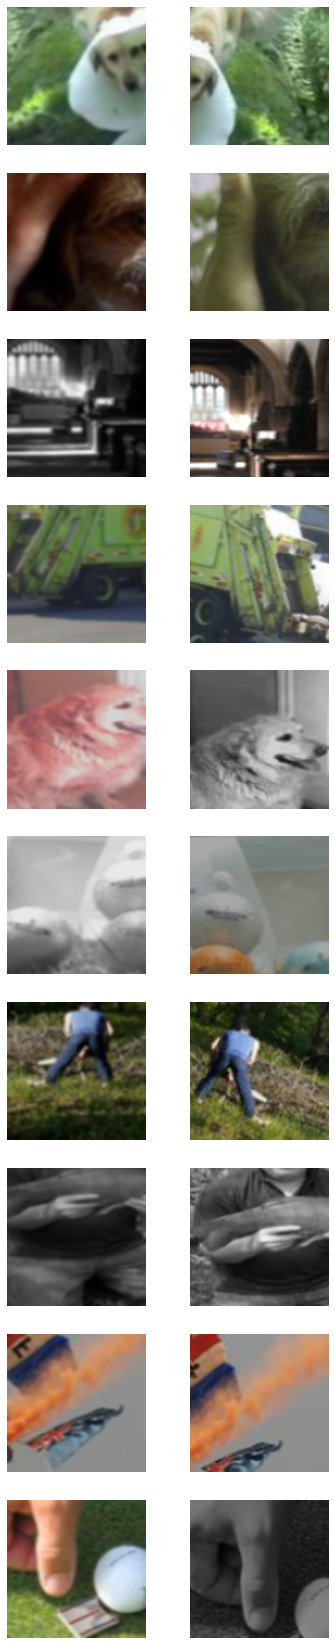

In [39]:
#Always check your data augs to see whether they make sense!
learn.sim_clr.show(n=10)

In [19]:
dls

In [42]:
#Next step: Learn a bit more about fastai dataloader objects

#Tinker with above

bs,resize,size = 4,160,128 #Change batch size to 4 to be small
dls = get_dls(resize,bs)
learn = Learner(dls,model,loss_func=noop,cbs=[SimCLR(aug_pipelines,temp=0.7,print_augs=True),
                                                     ShortEpochCallback(0.001)])

https://s3.amazonaws.com/fast-ai-imageclas/imagewang-160.tgz
Pipeline: RandomResizedCrop -> RandomHorizontalFlip -> ColorJitter -> RandomGrayscale -> RandomGaussianBlur -- {'p': 0.25, 's': (4, 16), 'same_on_batch': False} -> Rotate -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]]), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]]), 'axes': (0, 2, 3)}
Pipeline: RandomResizedCrop -> RandomHorizontalFlip -> ColorJitter -> RandomGrayscale -> RandomGaussianBlur -- {'p': 0.25, 's': (4, 16), 'same_on_batch': False} -> Rotate -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]]), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]]), 

[<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>]

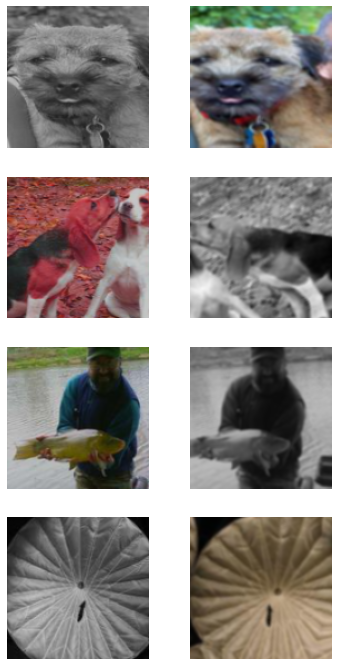

In [43]:
#contin...
b = dls.one_batch()
learn._split(b)
learn("before_batch")
learn.sim_clr.show(n=4)

[<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>]

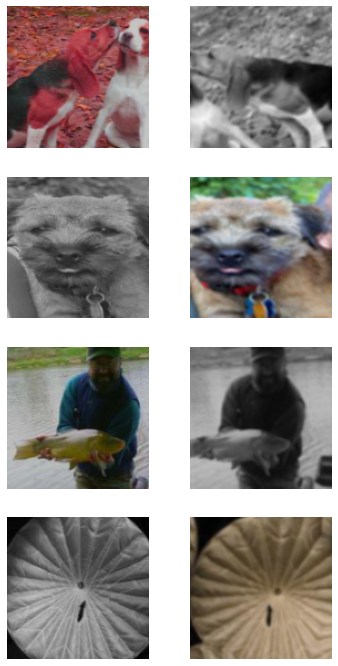

In [44]:
#contin
learn.sim_clr.show(n=4) #Note, same as above cell

[<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>]

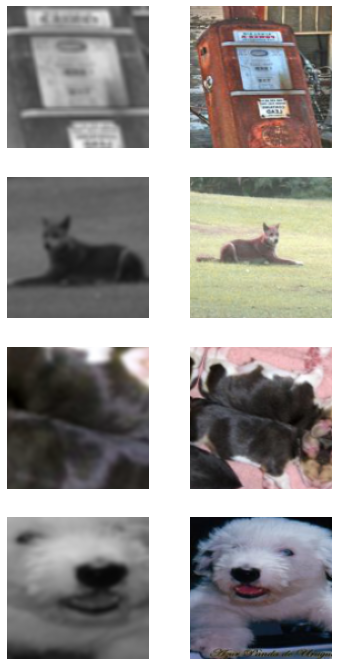

In [45]:
#Contin
#Now, let's re-run above. Hypothesis: the batch should be different

b = dls.one_batch()
learn._split(b)
learn("before_batch")
learn.sim_clr.show(n=4)

#Hypothesis is confirmed.

In [61]:
#Now train:
#Note: had to change workers to 0 in order for this to work

bs,resize,size = 4,160,128 #Change batch size to 4 to be small
dls = get_dls(resize,bs,workers=0)
learn = Learner(dls,model,loss_func=noop,cbs=[SimCLR(aug_pipelines,temp=0.7,print_augs=True),
                                                     ShortEpochCallback(0.001)])
learn.fit(1)


https://s3.amazonaws.com/fast-ai-imageclas/imagewang-160.tgz
Pipeline: RandomResizedCrop -> RandomHorizontalFlip -> ColorJitter -> RandomGrayscale -> RandomGaussianBlur -- {'p': 0.25, 's': (4, 16), 'same_on_batch': False} -> Rotate -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]]), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]]), 'axes': (0, 2, 3)}
Pipeline: RandomResizedCrop -> RandomHorizontalFlip -> ColorJitter -> RandomGrayscale -> RandomGaussianBlur -- {'p': 0.25, 's': (4, 16), 'same_on_batch': False} -> Rotate -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0} -> Normalize -- {'mean': tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]]), 'std': tensor([[[[0.2290]],

         [[0.2240]],

         [[0.2250]]]]), 

In [62]:
learn.recorder.losses


[TensorBase(1.4197),
 TensorBase(1.7001),
 TensorBase(1.7174),
 TensorBase(1.7320),
 TensorBase(1.7295),
 TensorBase(1.7560),
 TensorBase(1.7475),
 TensorBase(1.7653),
 TensorBase(1.7792),
 TensorBase(1.7595),
 TensorBase(1.7520),
 TensorBase(1.7135),
 TensorBase(1.7026),
 TensorBase(1.6976),
 TensorBase(1.7502),
 TensorBase(1.7936),
 TensorBase(1.7547),
 TensorBase(1.7401),
 TensorBase(1.7891),
 TensorBase(1.7550),
 TensorBase(1.7390),
 TensorBase(1.7311),
 TensorBase(1.7611),
 TensorBase(1.7578),
 TensorBase(1.7599),
 TensorBase(1.7475),
 TensorBase(1.7504),
 TensorBase(1.7315),
 TensorBase(1.7239),
 TensorBase(1.7313),
 TensorBase(1.7380),
 TensorBase(1.7555),
 TensorBase(1.7570),
 TensorBase(1.7575),
 TensorBase(1.7417),
 TensorBase(1.7373),
 TensorBase(1.7405),
 TensorBase(1.7729),
 TensorBase(1.7699),
 TensorBase(1.7506),
 TensorBase(1.7501),
 TensorBase(1.7458),
 TensorBase(1.7637),
 TensorBase(1.7575),
 TensorBase(1.7559),
 TensorBase(1.7446),
 TensorBase(1.7440),
 TensorBase(1